In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA([b for (i, b) in enumerate(lepping_db.all()) if i % 12 == 0], mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

05/01/2019 11:47:03 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
05/01/2019 11:47:04 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
05/01/2019 11:47:06 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control02/func/sub-control02_task-music_run-3_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
05/01/2019 11:47:08 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control

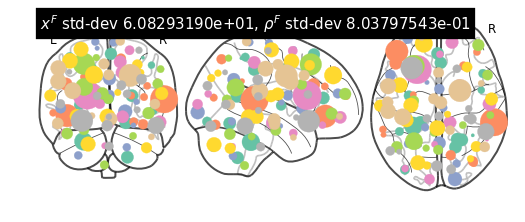

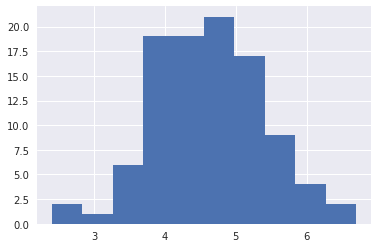

(<nilearn.plotting.displays.OrthoProjector at 0x7f2d378280b8>,
 tensor([[-3.4917e+01, -8.5298e+01, -1.2025e+01],
         [ 4.7106e+01,  1.5910e+01, -7.3132e-01],
         [-5.6496e-01,  3.7006e+01,  1.2773e+01],
         [-1.8442e+01, -3.5488e+01,  4.2743e+01],
         [ 2.0035e+01, -5.3205e+01, -5.0140e+01],
         [ 3.6426e+01, -4.9146e+01,  5.4556e+01],
         [-2.6226e+01, -3.9155e+01, -3.3471e+01],
         [ 2.7426e+00,  2.7138e+01,  5.8594e+01],
         [-3.0695e+01, -7.3944e+00,  4.8522e+00],
         [ 2.4895e+01, -5.3904e+01,  1.4617e+01],
         [ 1.8292e+01, -6.1475e+01, -1.3934e+01],
         [ 4.5417e+01, -1.5556e+00,  4.6701e+01],
         [-4.0625e+01, -4.5080e+01,  5.5758e+01],
         [ 1.3304e+01, -7.0024e+01,  5.3591e+01],
         [-2.6159e+01, -6.3769e+00,  3.4305e+01],
         [-4.3430e+01,  3.9251e+01, -6.3440e+00],
         [ 2.4188e+01,  6.1233e+01,  1.4684e+01],
         [ 3.7576e+01, -7.8311e+01,  1.3144e+01],
         [ 4.0852e+01,  3.8583e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate=2e-3, log_level=logging.INFO, num_particles=1,
                    batch_size=3, use_cuda=True, checkpoint_steps=100, blocks_batch_size=2, patience=100)

05/01/2019 11:50:57 [Epoch 1] (11379ms) Posterior free-energy 3.82305920e+07 = KL from prior 7.74865150e+06 - log-likelihood -3.04819340e+07
05/01/2019 11:50:57 Saving checkpoint...
05/01/2019 11:51:08 [Epoch 2] (11249ms) Posterior free-energy 3.01276600e+07 = KL from prior 1.80037578e+05 - log-likelihood -2.99476260e+07
05/01/2019 11:51:20 [Epoch 3] (11453ms) Posterior free-energy 2.96096240e+07 = KL from prior 8.72485625e+04 - log-likelihood -2.95223760e+07
05/01/2019 11:51:31 [Epoch 4] (11157ms) Posterior free-energy 2.91535340e+07 = KL from prior 5.27863516e+04 - log-likelihood -2.91007500e+07
05/01/2019 11:51:42 [Epoch 5] (11280ms) Posterior free-energy 2.86898760e+07 = KL from prior 3.70179766e+04 - log-likelihood -2.86528580e+07
05/01/2019 11:51:54 [Epoch 6] (11565ms) Posterior free-energy 2.85165920e+07 = KL from prior 2.75634688e+04 - log-likelihood -2.84890280e+07
05/01/2019 11:52:05 [Epoch 7] (11460ms) Posterior free-energy 2.82742280e+07 = KL from prior 2.21779961e+04 - log

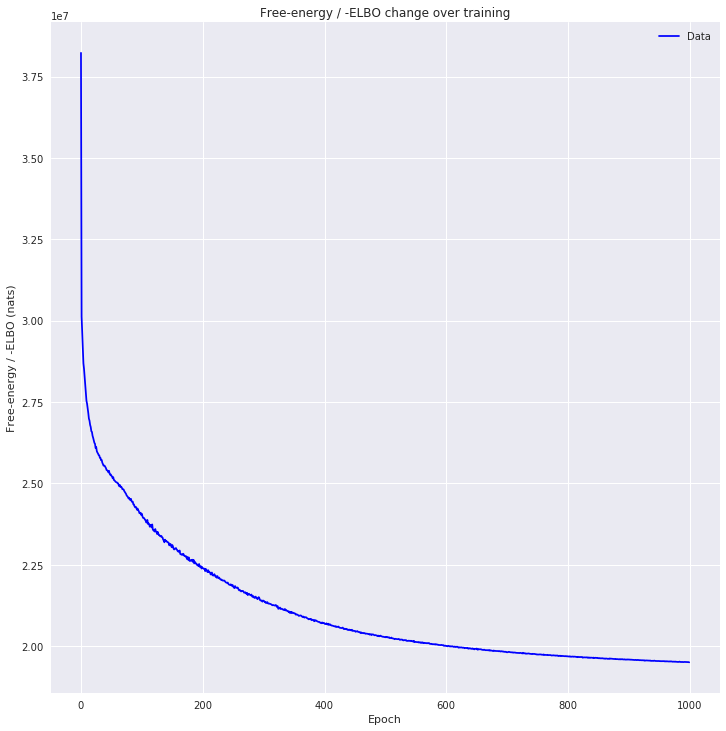

In [9]:
utils.plot_losses(losses)

In [10]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [11]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    else:
        task = block.task.capitalize()
    return task

In [12]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

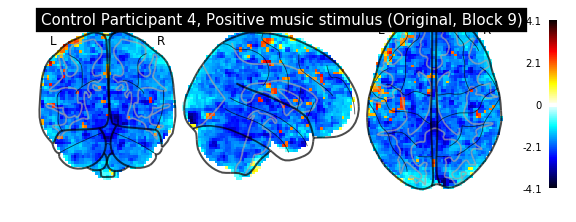

05/01/2019 14:55:29 Reconstruction Error (Frobenius Norm): 5.49665344e+02 out of 9.26606873e+02


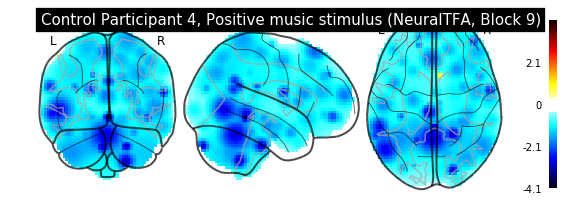

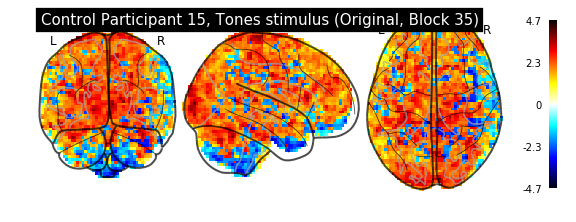

05/01/2019 14:55:34 Reconstruction Error (Frobenius Norm): 8.14712585e+02 out of 9.11008118e+02


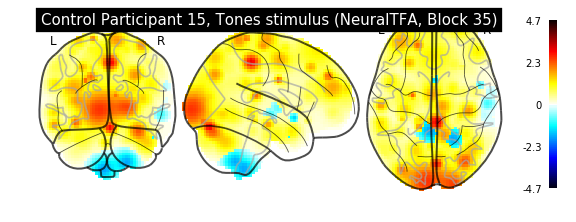

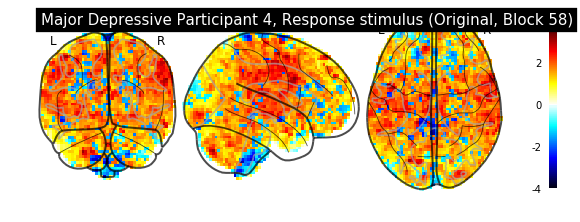

05/01/2019 14:55:36 Reconstruction Error (Frobenius Norm): 1.85253815e+02 out of 2.20287140e+02


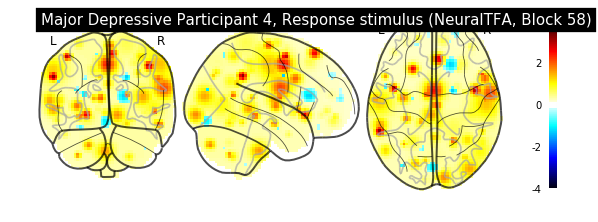

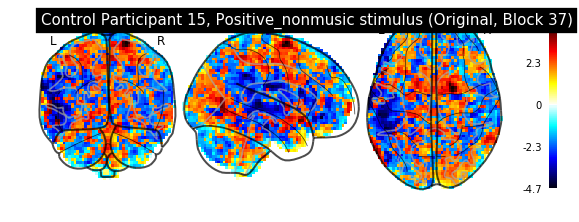

05/01/2019 14:55:41 Reconstruction Error (Frobenius Norm): 7.56161133e+02 out of 8.00891602e+02


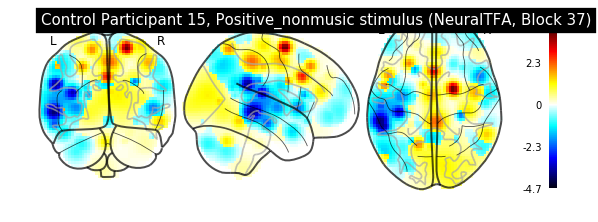

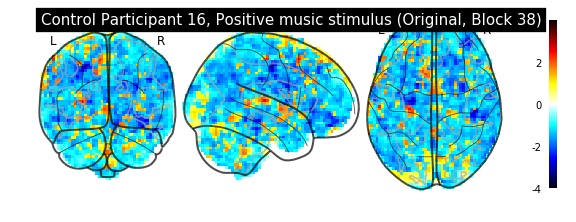

05/01/2019 14:55:45 Reconstruction Error (Frobenius Norm): 5.13436157e+02 out of 6.30471802e+02


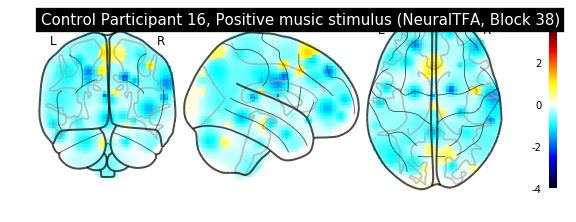

In [13]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

05/01/2019 14:55:46 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/01/2019 14:55:46 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/01/2019 14:55:46 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/01/2019 14:55:46 'c' argument looks like a single numeric RGB or RGBA sequence, which sh

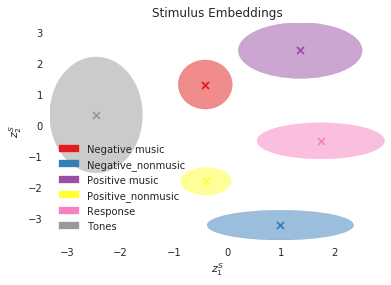

In [14]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

05/01/2019 14:55:46 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/01/2019 14:55:46 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/01/2019 14:55:46 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/01/2019 14:55:46 'c' argument looks like a single numeric RGB or RGBA sequence, which sh

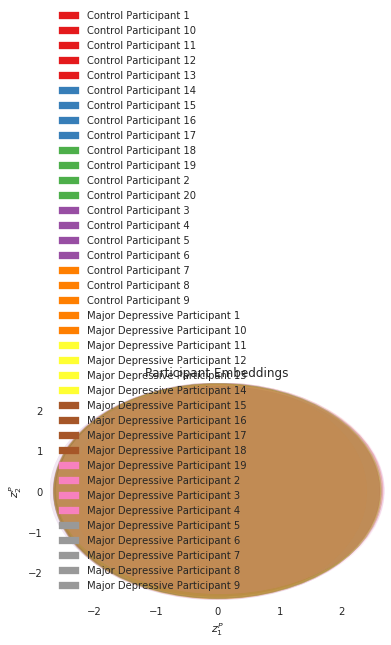

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

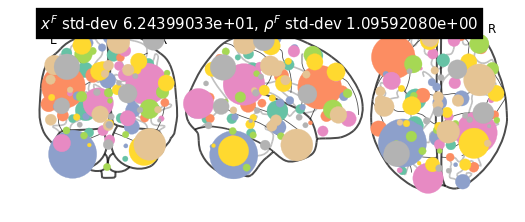

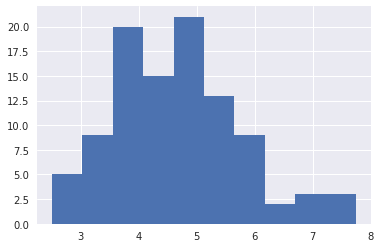

(<nilearn.plotting.displays.OrthoProjector at 0x7f2d087efac8>,
 tensor([[-3.7514e+01, -8.6414e+01, -9.5619e+00],
         [ 4.9341e+01,  1.2663e+01,  1.0605e+00],
         [-5.0569e+00,  3.7908e+01,  1.6823e+01],
         [-2.4351e+01, -3.7294e+01,  4.1778e+01],
         [ 1.7829e+01, -5.0476e+01, -5.1801e+01],
         [ 3.5472e+01, -5.2921e+01,  5.5458e+01],
         [-2.0250e+01, -3.8939e+01, -2.4275e+01],
         [ 5.3687e+00,  2.9838e+01,  5.7484e+01],
         [-2.3699e+01, -1.1251e+01, -7.6658e-01],
         [ 2.4463e+01, -4.6778e+01,  1.3107e+01],
         [ 1.3412e+01, -5.9189e+01, -9.0218e+00],
         [ 4.2064e+01,  3.7520e-01,  4.7931e+01],
         [-4.3802e+01, -4.1784e+01,  5.9246e+01],
         [ 1.2691e+01, -7.2151e+01,  5.4665e+01],
         [-1.6188e+01, -7.0418e+00,  3.6087e+01],
         [-4.7865e+01,  4.0332e+01, -6.1754e+00],
         [ 2.3146e+01,  5.6662e+01,  1.9165e+01],
         [ 3.7331e+01, -8.2842e+01,  1.3108e+01],
         [ 4.5124e+01,  4.2911e+01,  

In [16]:
dtfa.visualize_factor_embedding()

In [17]:
dtfa.average_reconstruction_error()

05/01/2019 14:56:02 Average reconstruction error (MSE): 7.25575598e-01
05/01/2019 14:56:02 Average data norm (Euclidean): 9.60465657e-01
05/01/2019 14:56:02 Percent average reconstruction error: 0.294578


(0.7255755976817678, 0.9604656573615109, 0.002945783263334543)

In [18]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

05/01/2019 14:56:02 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/01/2019 14:56:02 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/01/2019 14:56:02 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
05/01/2019 14:56:02 'c' argument looks like a single numeric RGB or RGBA sequence, which sh

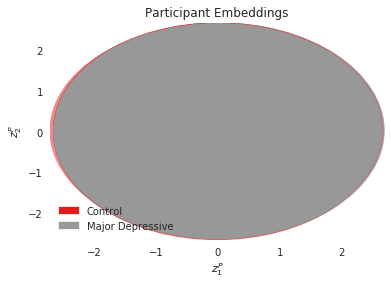

In [19]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)